<a href="https://colab.research.google.com/github/Justworkname/6367/blob/main/6367_hw_3_Chance_Gammill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW portion

In [2]:
#  Input [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

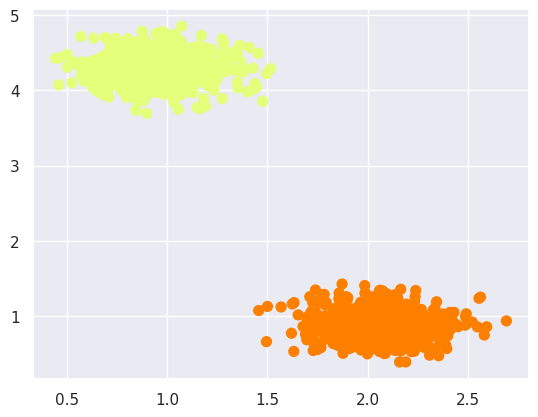

In [9]:
#  Input [2]:

# make blob function with sets a center then generates random points a gaussian distrubution from the center. It actually is spherical but the scaling makes it look non circular.
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=0.20)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Wistia');

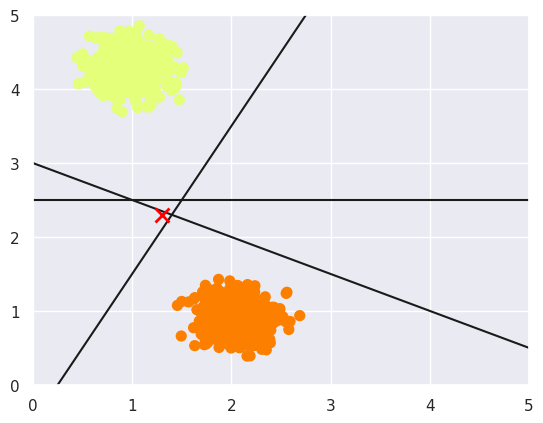

In [26]:
#  Input [3]:
#same plot as previous one jsut plotting X and y that were generated blobs
xfit = np.linspace(0, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Wistia')

#these are just lines that we make
for m, b in [(2, -0.5), (0, 2.5), (-0.5, 3)]:
    plt.plot(xfit, m * xfit + b, '-k')

#x marks the spot
plt.plot([1.3], [2.3], 'x', color='red', markeredgewidth=2, markersize=10)
#lims
plt.xlim(0, 5);
plt.ylim(0,5);

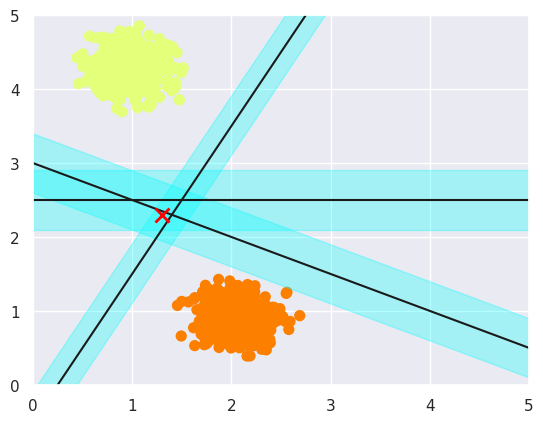

In [44]:
#  Input [4]:
#same plot as previous one jsut plotting X and y that were generated blobs
xfit = np.linspace(0, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Wistia')


#these are just lines that we make
for m, b, d in [(2, -0.5,0.4), (0, 2.5,0.4), (-0.5, 3,0.4)]:
    yfit = m * xfit + b
    plt.plot(xfit, m * xfit + b, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='#000000',
                     color='#00FFFF', alpha=0.3)
#x marks the spot
plt.plot([1.3], [2.3], 'x', color='red', markeredgewidth=2, markersize=10)
#lims
plt.xlim(0, 5);
plt.ylim(0,5);


In [46]:
#  Input [5]:

from sklearn.svm import SVC # "Support vector classifier"
#this is decciding whether or not the data can be seperated with a 'poly' function
model = SVC(kernel='poly', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='poly')

In [47]:
#  Input [6]:

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    #^
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

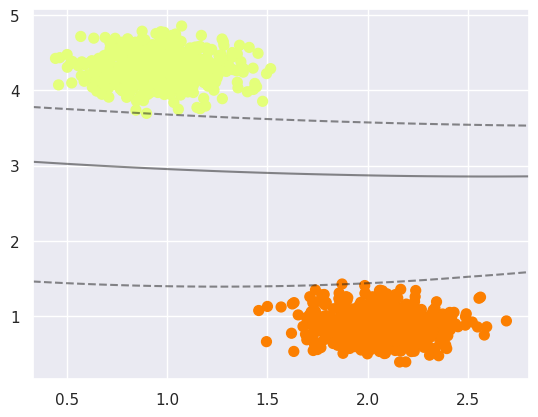

In [49]:
#  Input [7]:

#calling the function created in the above section
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Wistia')
plot_svc_decision_function(model);

In [50]:
#  Input [8]:
# holds the values for the poly function
model.support_vectors_

array([[0.89779228, 3.69455872],
       [1.87133738, 1.4262508 ]])

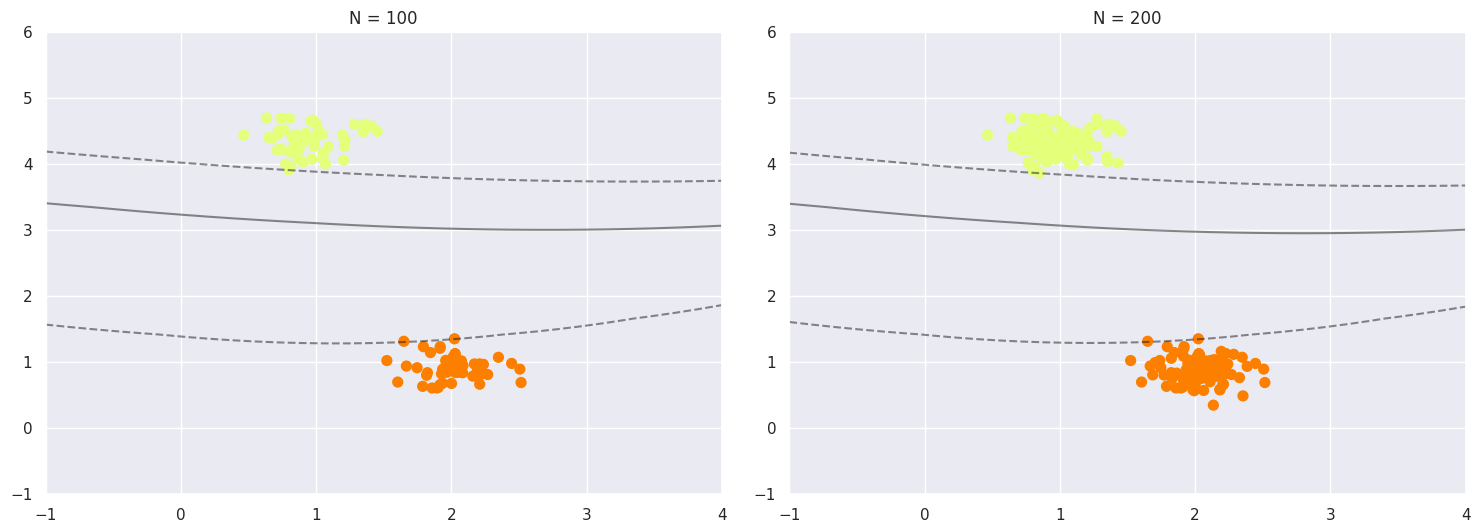

In [59]:
#  Input [9]:

def plot_svm(N=100, ax=None):
  # same blob function
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.20)
    # only choosing the first N elements
    X = X[:N]
    y = y[:N]
    # model fit
    model = SVC(kernel='poly', C=1E10)
    model.fit(X, y)

    # plotting
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Wistia')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

# making subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# calling function for each
for axi, N in zip(ax, [100, 200]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


interactive(children=(Dropdown(description='N', options=(100, 200), value=100), Output()), _dom_classes=('widg…

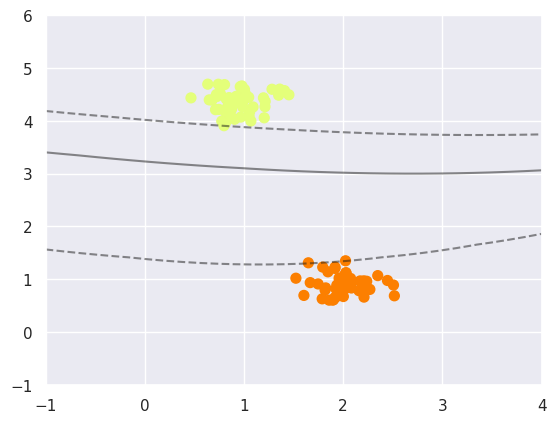

In [62]:
#  Input [10]:

#I really do not like this... interact automatically creates a new graph when you change the values and keeps the old one
from ipywidgets import interact, fixed
interact(plot_svm, N=[100, 200], ax=fixed(None));

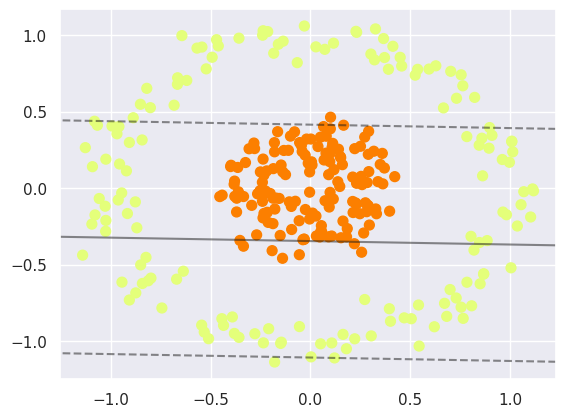

In [71]:
#  Input [11]:

from sklearn.datasets import make_circles
X, y = make_circles(300, factor=.3, noise=.1)

#poly is weird on this one
clf = SVC(kernel='linear').fit(X, y)

#same plotting
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Wistia')
plot_svc_decision_function(clf, plot_support=False);


In [73]:
#  Input [12]:
#just make a nother function for X
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

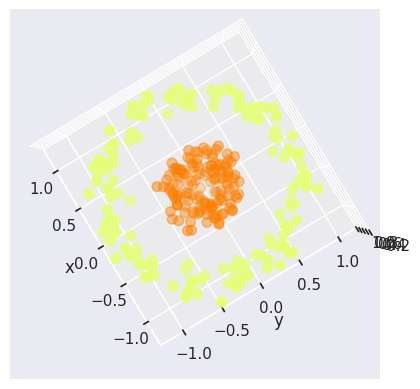

In [77]:
#  Input [13]:

from mpl_toolkits import mplot3d

#plotting
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='Wistia')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
#please no, there has to be a better way
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));


In [78]:
#  Input [14]:
# jsut another SVC
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

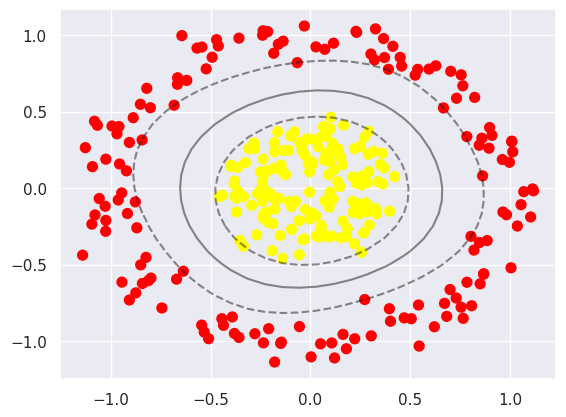

In [79]:
#  Input [15]:
#more plotting with previous funcitons
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Wistia')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

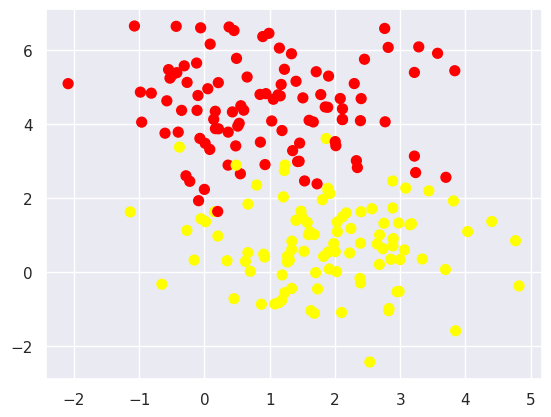

In [80]:
#  Input [16]:
#more blobs, but this time closer to eachother, will not change for purpose of proving the codes purpose
X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


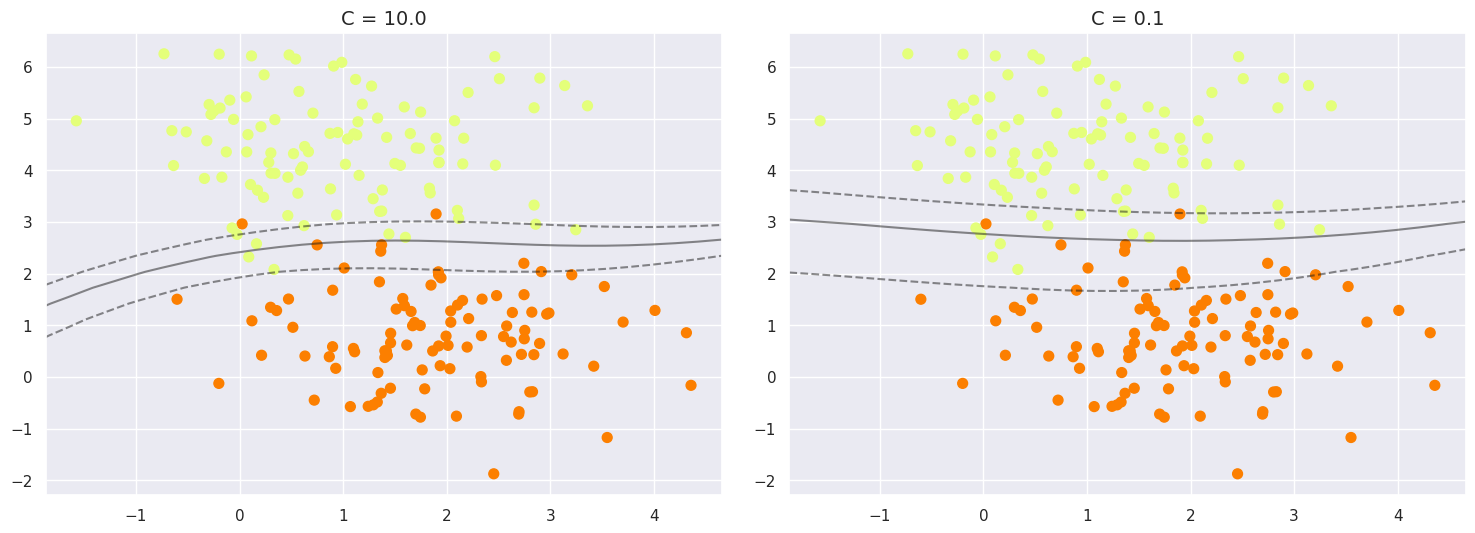

In [82]:
#  Input [17]:
# Nearly identical with 'Input 9'

X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='poly', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Wistia')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [83]:
#  Input [18]:

#grab faces from lfw_people dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


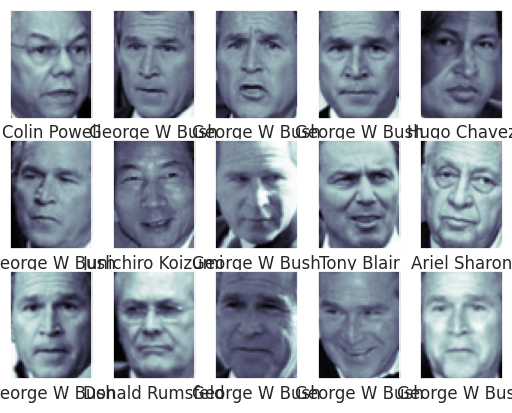

In [ ]:
#  Input [19]:
#more imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#plot the faces with their name
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])


In [84]:
#  Input [20]:

from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA  # Old version
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# principle component Analysis, finds the matricies which most represnt the data and uses that information the see if it is the same face that they have been observing.
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
#creatin an SVC then piplining that model
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [86]:
#  Input [21]:
#from sklearn.cross_validation import train_test_split # Old version
from sklearn.model_selection import train_test_split
#splits the data, do not know whyy but I always see random_state=42 not sure how changing it does anything
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=40)


In [91]:
#  Input [22]:
#from sklearn.grid_search import GridSearchCV   #Old version
from sklearn.model_selection import GridSearchCV
#dictionary for defining the Gamma and C values for training
#C is for regularization, and gamma is the kernel coefficent is think in this case it is controlling how much to change the values after every iteration
param_grid = {'svc__C': [0.5,1, 5, 10],
              'svc__gamma': [ 0.0005, 0.001, 0.005, 0.01]}

#this performs a grid search which tries to find the bet fit model for seperating the faces
grid = GridSearchCV(model, param_grid)

#checks how long it takes
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
#even after changing the different values of gamma and c the best values stayed the same


CPU times: user 1min 1s, sys: 40 s, total: 1min 41s
Wall time: 1min 10s
{'svc__C': 1, 'svc__gamma': 0.005}


In [94]:
#  Input [23]:
#use the model that had the best values
model = grid.best_estimator_
yfit = model.predict(Xtest)


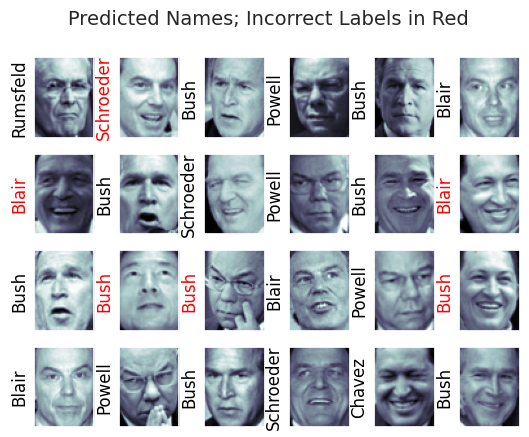

In [95]:
#  Input [24]:
#more plotting
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [96]:
#  Input [25]:
from sklearn.metrics import classification_report
#print the evaluation of the model
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.50      0.64        16
     Colin Powell       0.68      0.89      0.77        54
  Donald Rumsfeld       0.86      0.88      0.87        34
    George W Bush       0.89      0.91      0.90       136
Gerhard Schroeder       0.85      0.81      0.83        27
      Hugo Chavez       1.00      0.50      0.67        18
Junichiro Koizumi       1.00      0.87      0.93        15
       Tony Blair       0.85      0.78      0.82        37

         accuracy                           0.84       337
        macro avg       0.88      0.77      0.80       337
     weighted avg       0.85      0.84      0.84       337



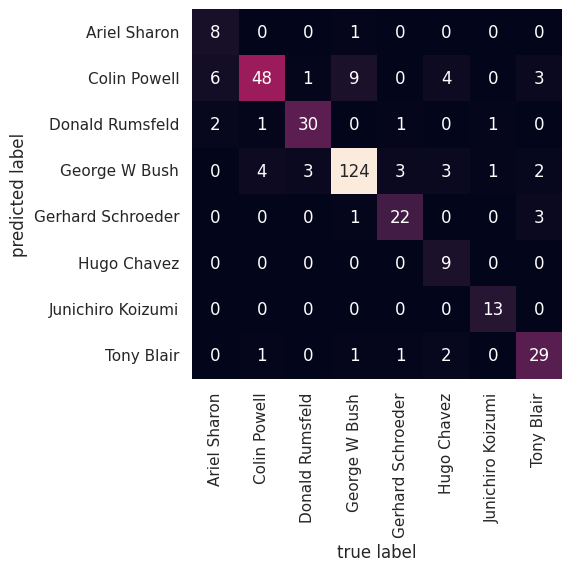

In [97]:
#  Input [26]:
from sklearn.metrics import confusion_matrix
#generating a confusion matrix for the model
mat = confusion_matrix(ytest, yfit)
#more plotting
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
#the below heat map shows who it is over predicting and who it is missing
# you can also see that due to a lack of data the network has some problems with Hugo Chavez and Ariel Sharon